<h1>Taiwanese Credit Default and Titanic Survivor Prediction</h1>
<p>

</p>
<p>

</p>

<ol>
<li>Exploratory Data Analysis and Data Munging
<li>Baseline Modeling
<li>Model Tuning and Performance Analysis
<li>Final Insights
</ol>



In [34]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [35]:
uci_dataset = pd.read_csv('UCI_Credit_Card.csv')

In [40]:
uci_dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [36]:
pd.set_option('display.max_columns', None)
uci_dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


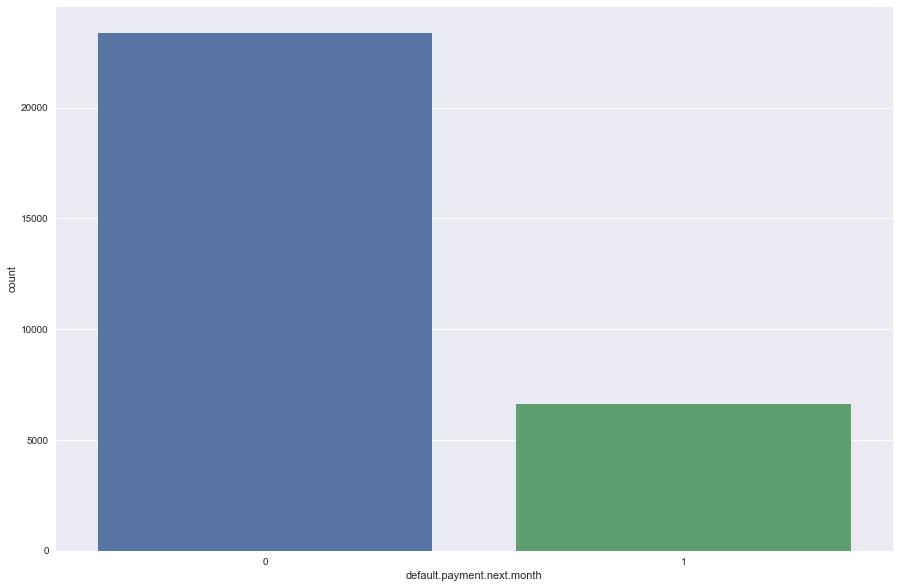

In [37]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
def_count = sns.countplot(uci_dataset['default.payment.next.month'])

Approximately 30% of individuals in the entire data set defaulted in the subsequent month of this data.

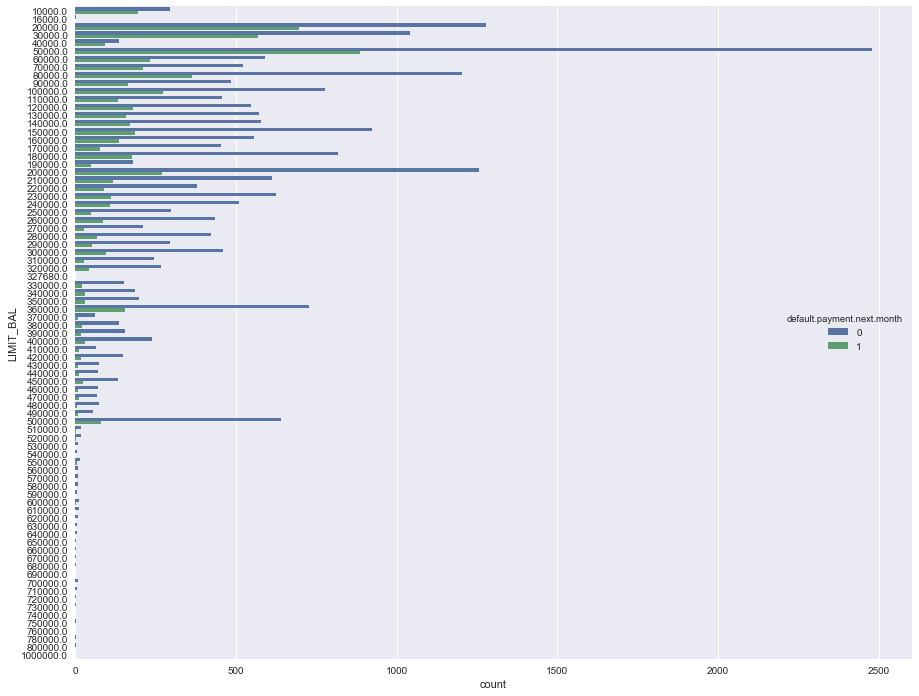

In [38]:
plt.figure(figsize=(15,12))
sns.set(font_scale=1)
limit_dist = sns.countplot(y='LIMIT_BAL',data=uci_dataset[['LIMIT_BAL','default.payment.next.month']], 
                           hue = 'default.payment.next.month'
                          )

#People with lower credit lines tend to have higher default occurences

<p>Individuals with lower credit balances are more prone to the likelihood of defaulting. With a little knowledge about how credit limit works, a higher limit is usually determined by income, credit history, and credit history. What this tells us is that be a good indicator of a person's stability, thus, they bear a better capacity of meeting their agreed minimum payments. <br> </br>

<br>To put these values into scale, the current exchange for a TWD to USD is 1 USD : 0.0333 TWD.</br> </p>

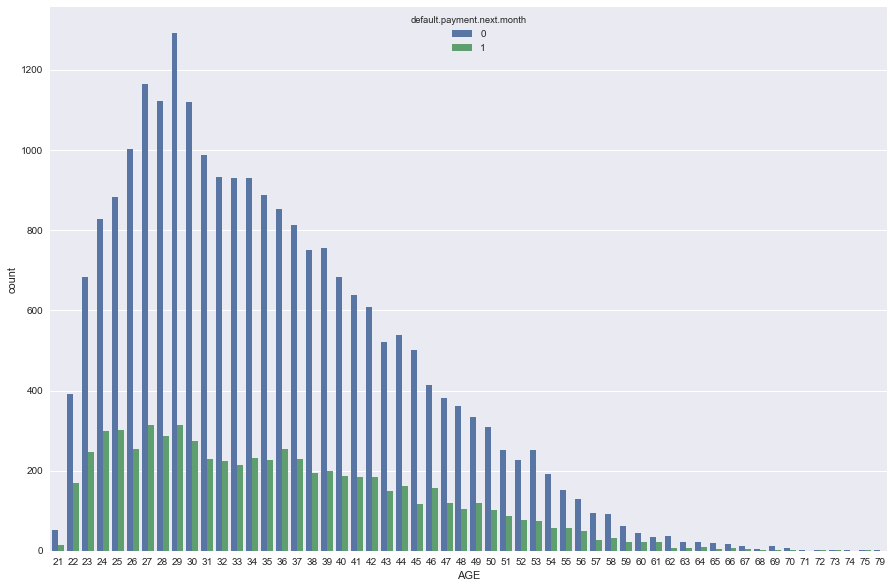

In [39]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
age_dist = sns.countplot(x='AGE', data=uci_dataset[['AGE','default.payment.next.month']], hue='default.payment.next.month')
#age is positively skewed


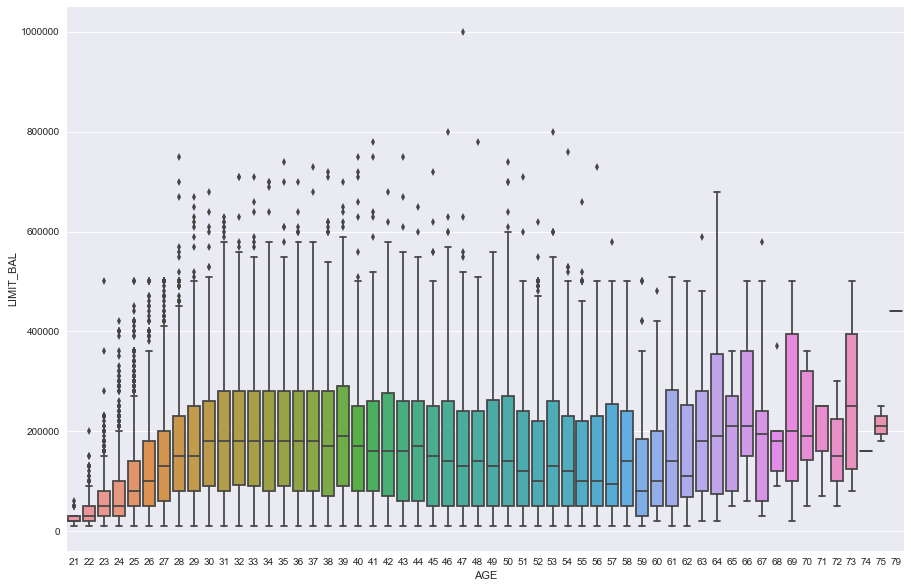

In [7]:
plt.figure(figsize=(15,10))
sns.boxplot(x='AGE', y='LIMIT_BAL', data=uci_dataset)

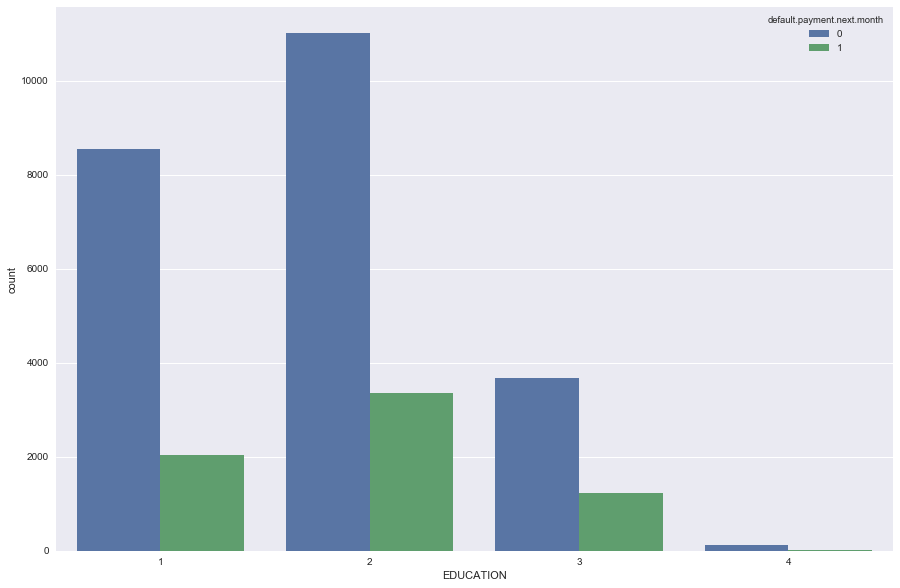

In [8]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)

ed_med=uci_dataset['EDUCATION'].median()

uci_dataset['EDUCATION'] = uci_dataset['EDUCATION'].replace(0, ed_med)
uci_dataset['EDUCATION'] = uci_dataset['EDUCATION'].replace(5, ed_med)
uci_dataset['EDUCATION'] = uci_dataset['EDUCATION'].replace(6, ed_med)

age_dist = sns.countplot(x='EDUCATION', data=uci_dataset[['EDUCATION', 'default.payment.next.month']], 
                         hue='default.payment.next.month')


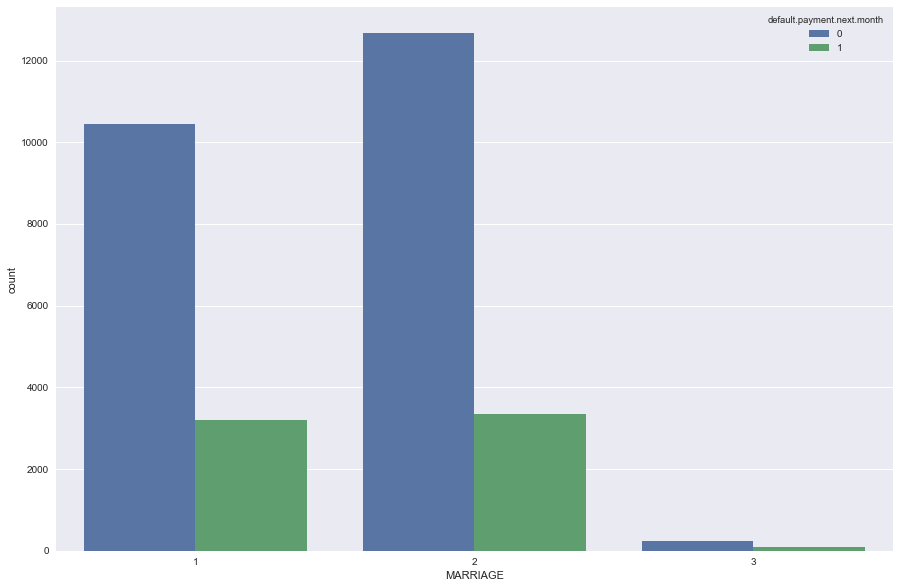

In [9]:
uci_dataset['MARRIAGE'] = uci_dataset['MARRIAGE'].replace(0, uci_dataset['MARRIAGE'].median())
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
age_dist = sns.countplot(x='MARRIAGE', data=uci_dataset[['MARRIAGE', 'default.payment.next.month']], 
                         hue='default.payment.next.month'
                         )

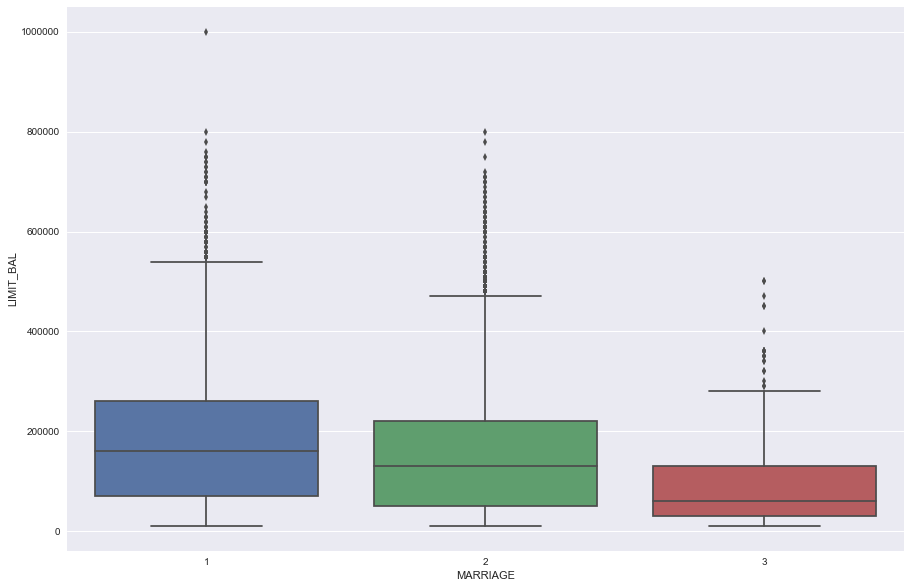

In [10]:
plt.figure(figsize=(15,10))
sns.boxplot(x='MARRIAGE', y='LIMIT_BAL', data=uci_dataset)

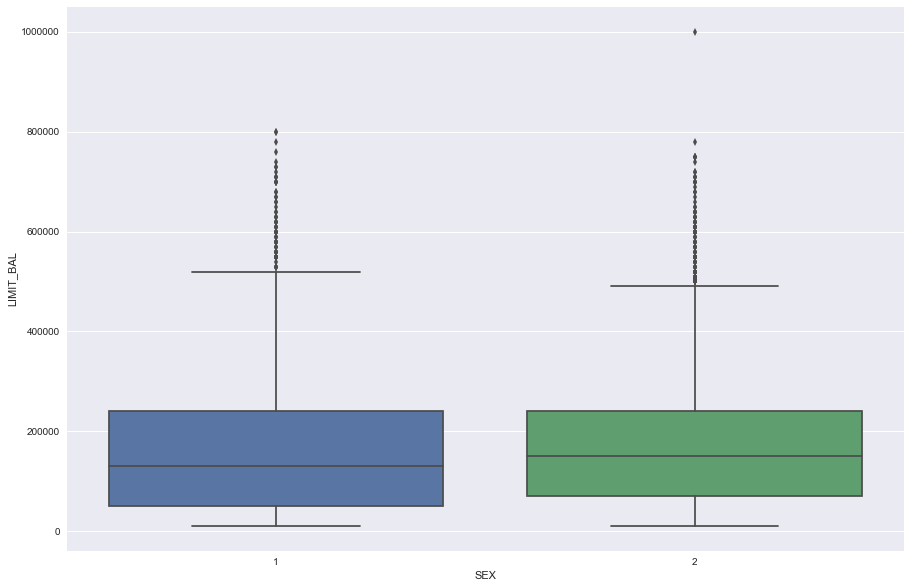

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(x='SEX', y='LIMIT_BAL', data=uci_dataset)

In the boxplot above, the 25th percentile amongst females is considerably higher than that of males. To explore this further, the following plot examines the progression of categorical distributions across age against limit balance. It is apparent that females reach higher medians faster, yet males exhibit wider ranges.

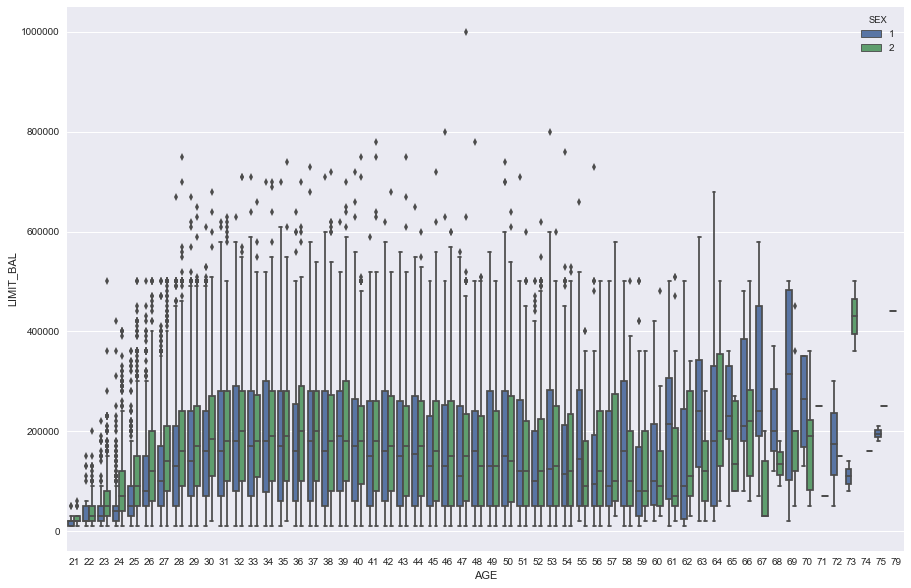

In [12]:
plt.figure(figsize=(15,10))
sns.boxplot(x='AGE', y='LIMIT_BAL', data=uci_dataset, hue='SEX')

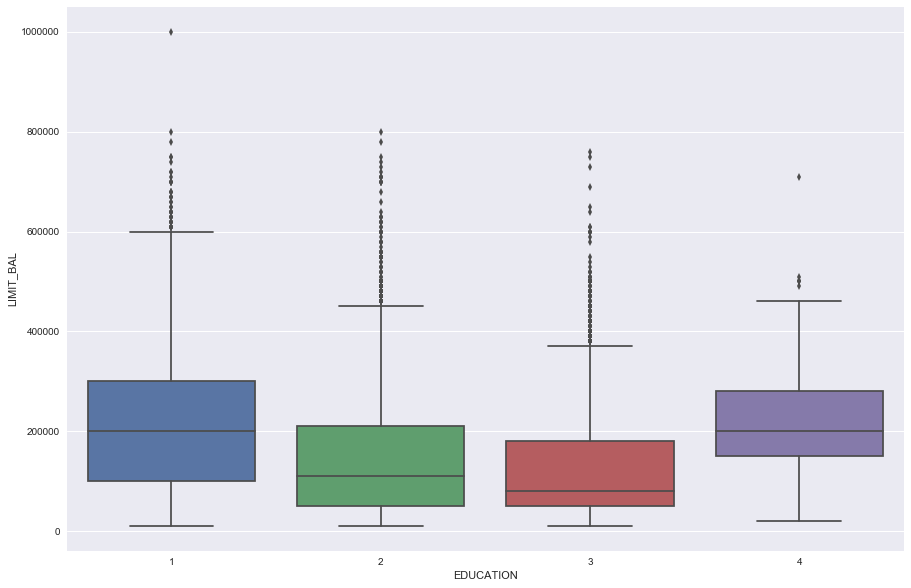

In [13]:
plt.figure(figsize=(15,10))
sns.boxplot(x='EDUCATION', y='LIMIT_BAL', data=uci_dataset)

Individuals in the dataset that completed graduate school seem to have the highest median income among the educational classes, whereas those who completed college or highschool remain at sub 200,000 NT dollars.

Additionally, married individuals seem to have a slightly higher median limit balance in comparison to single individuals.

<Figure size 1080x720 with 0 Axes>

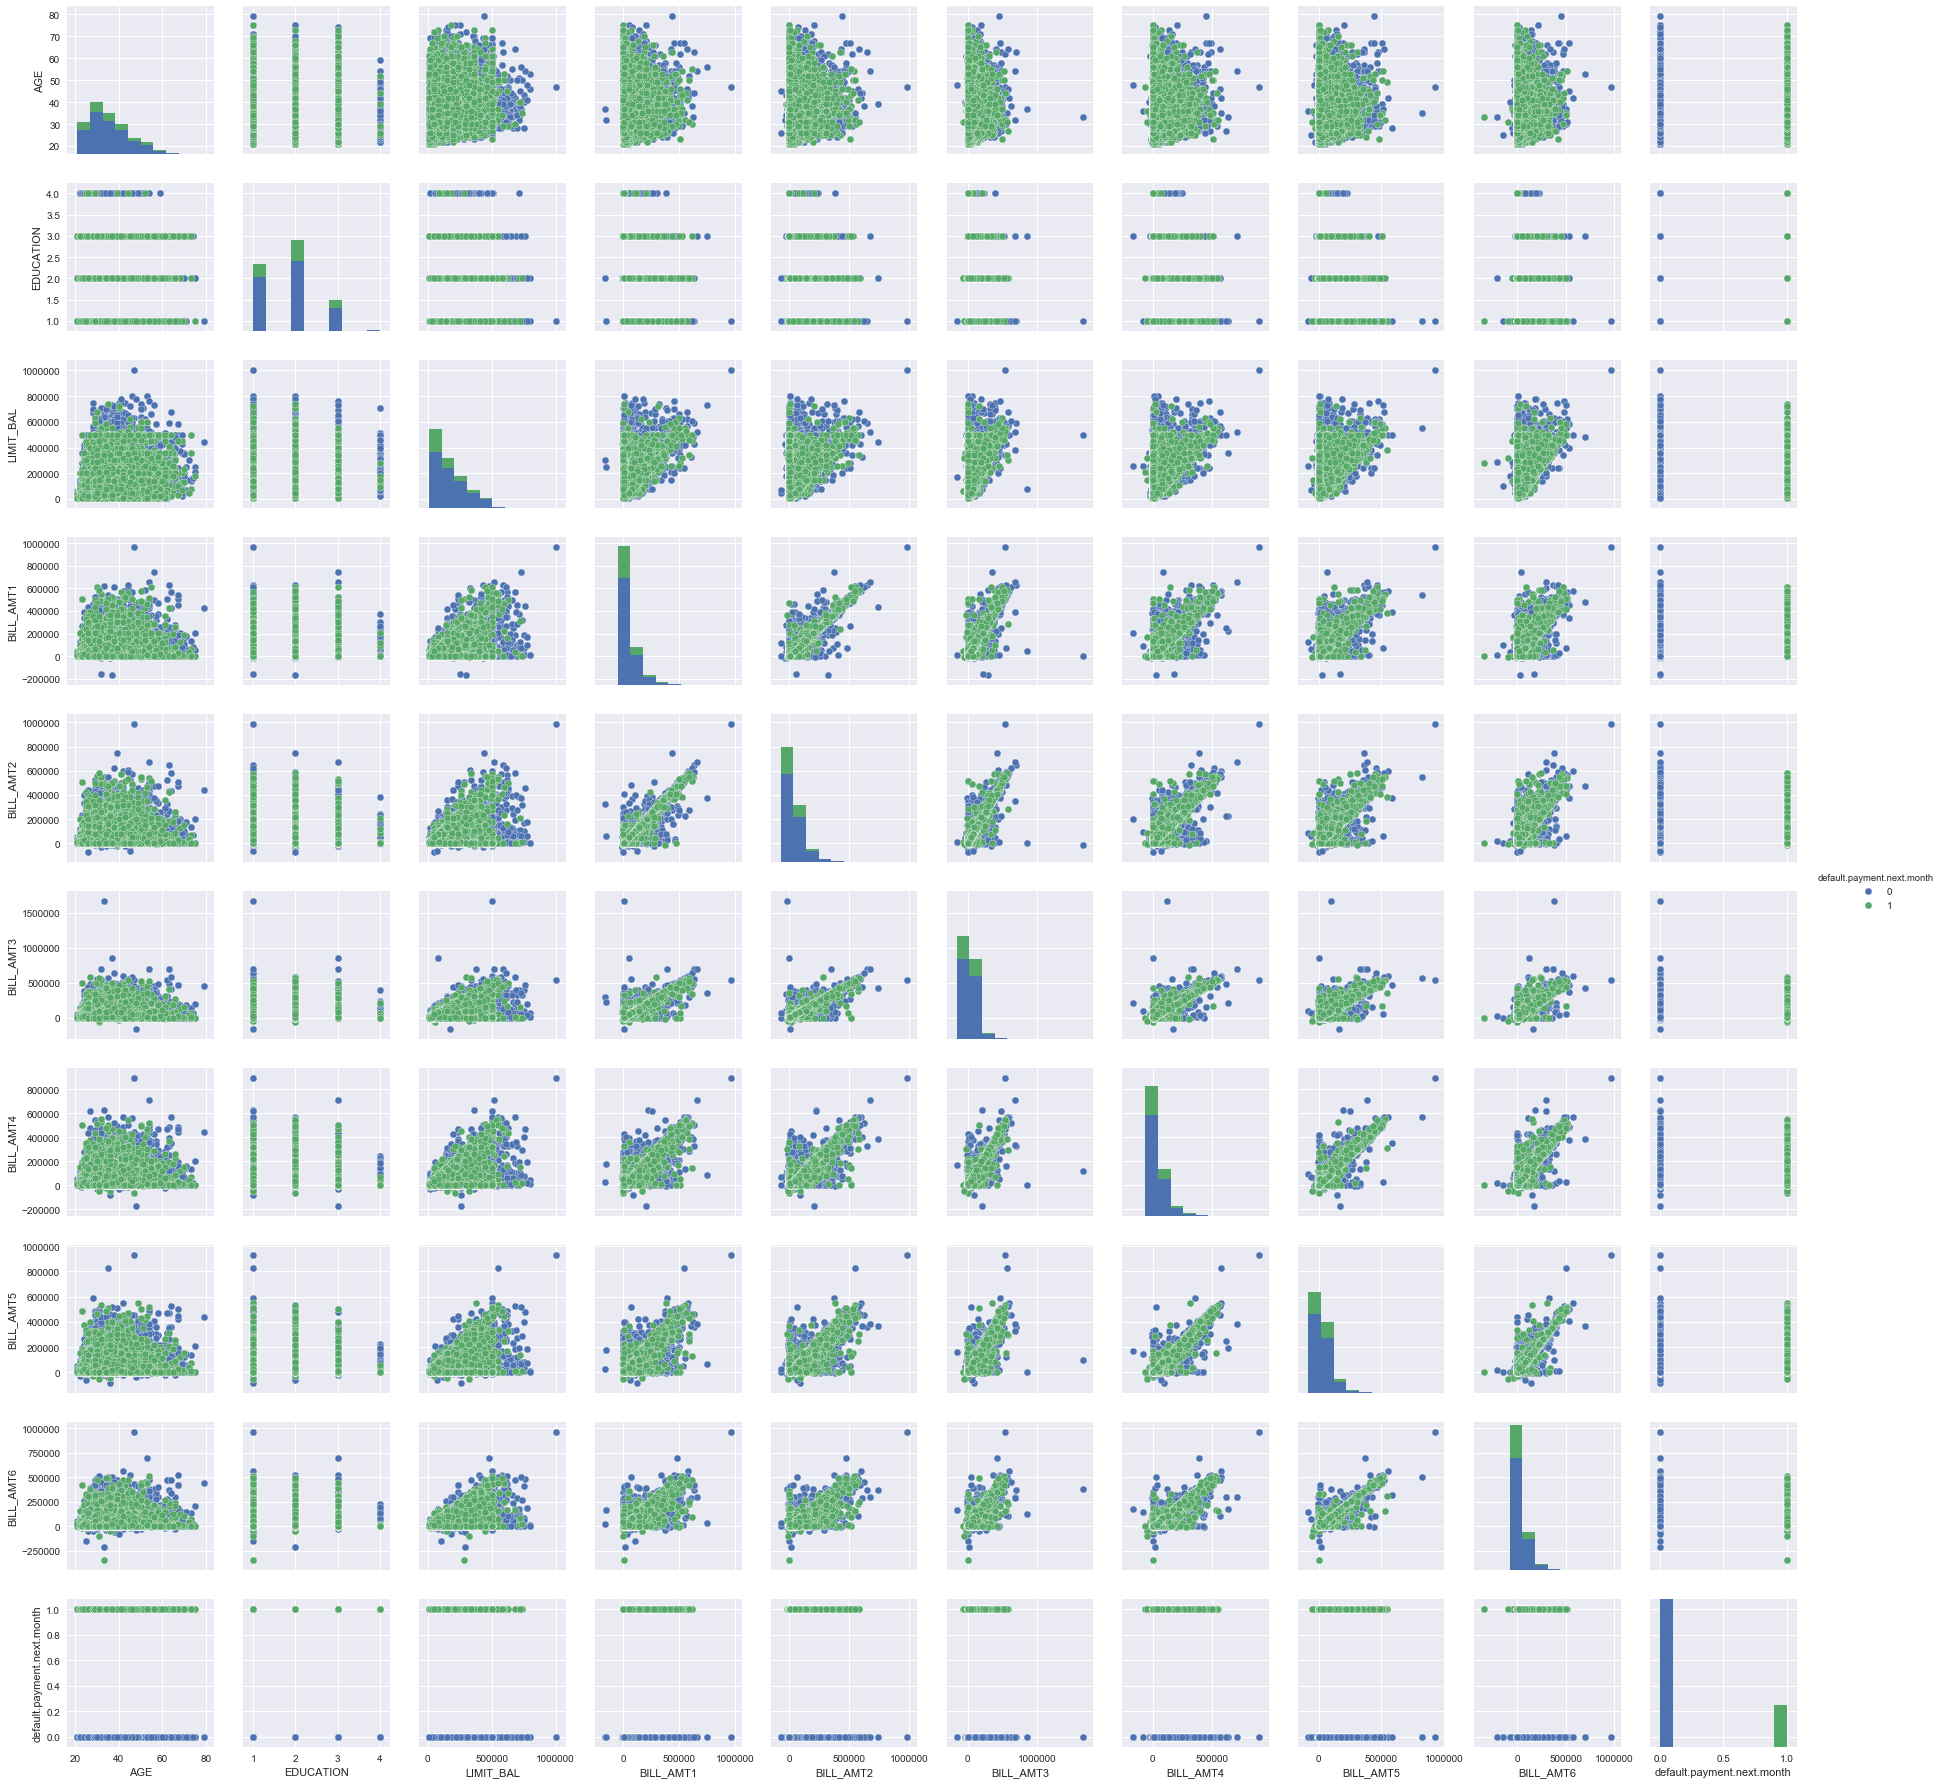

In [14]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
bill_amounts = uci_dataset[['AGE', 'EDUCATION', 'LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6', 'default.payment.next.month']]
sns.pairplot(data=bill_amounts,hue="default.payment.next.month")

<Figure size 1080x720 with 0 Axes>

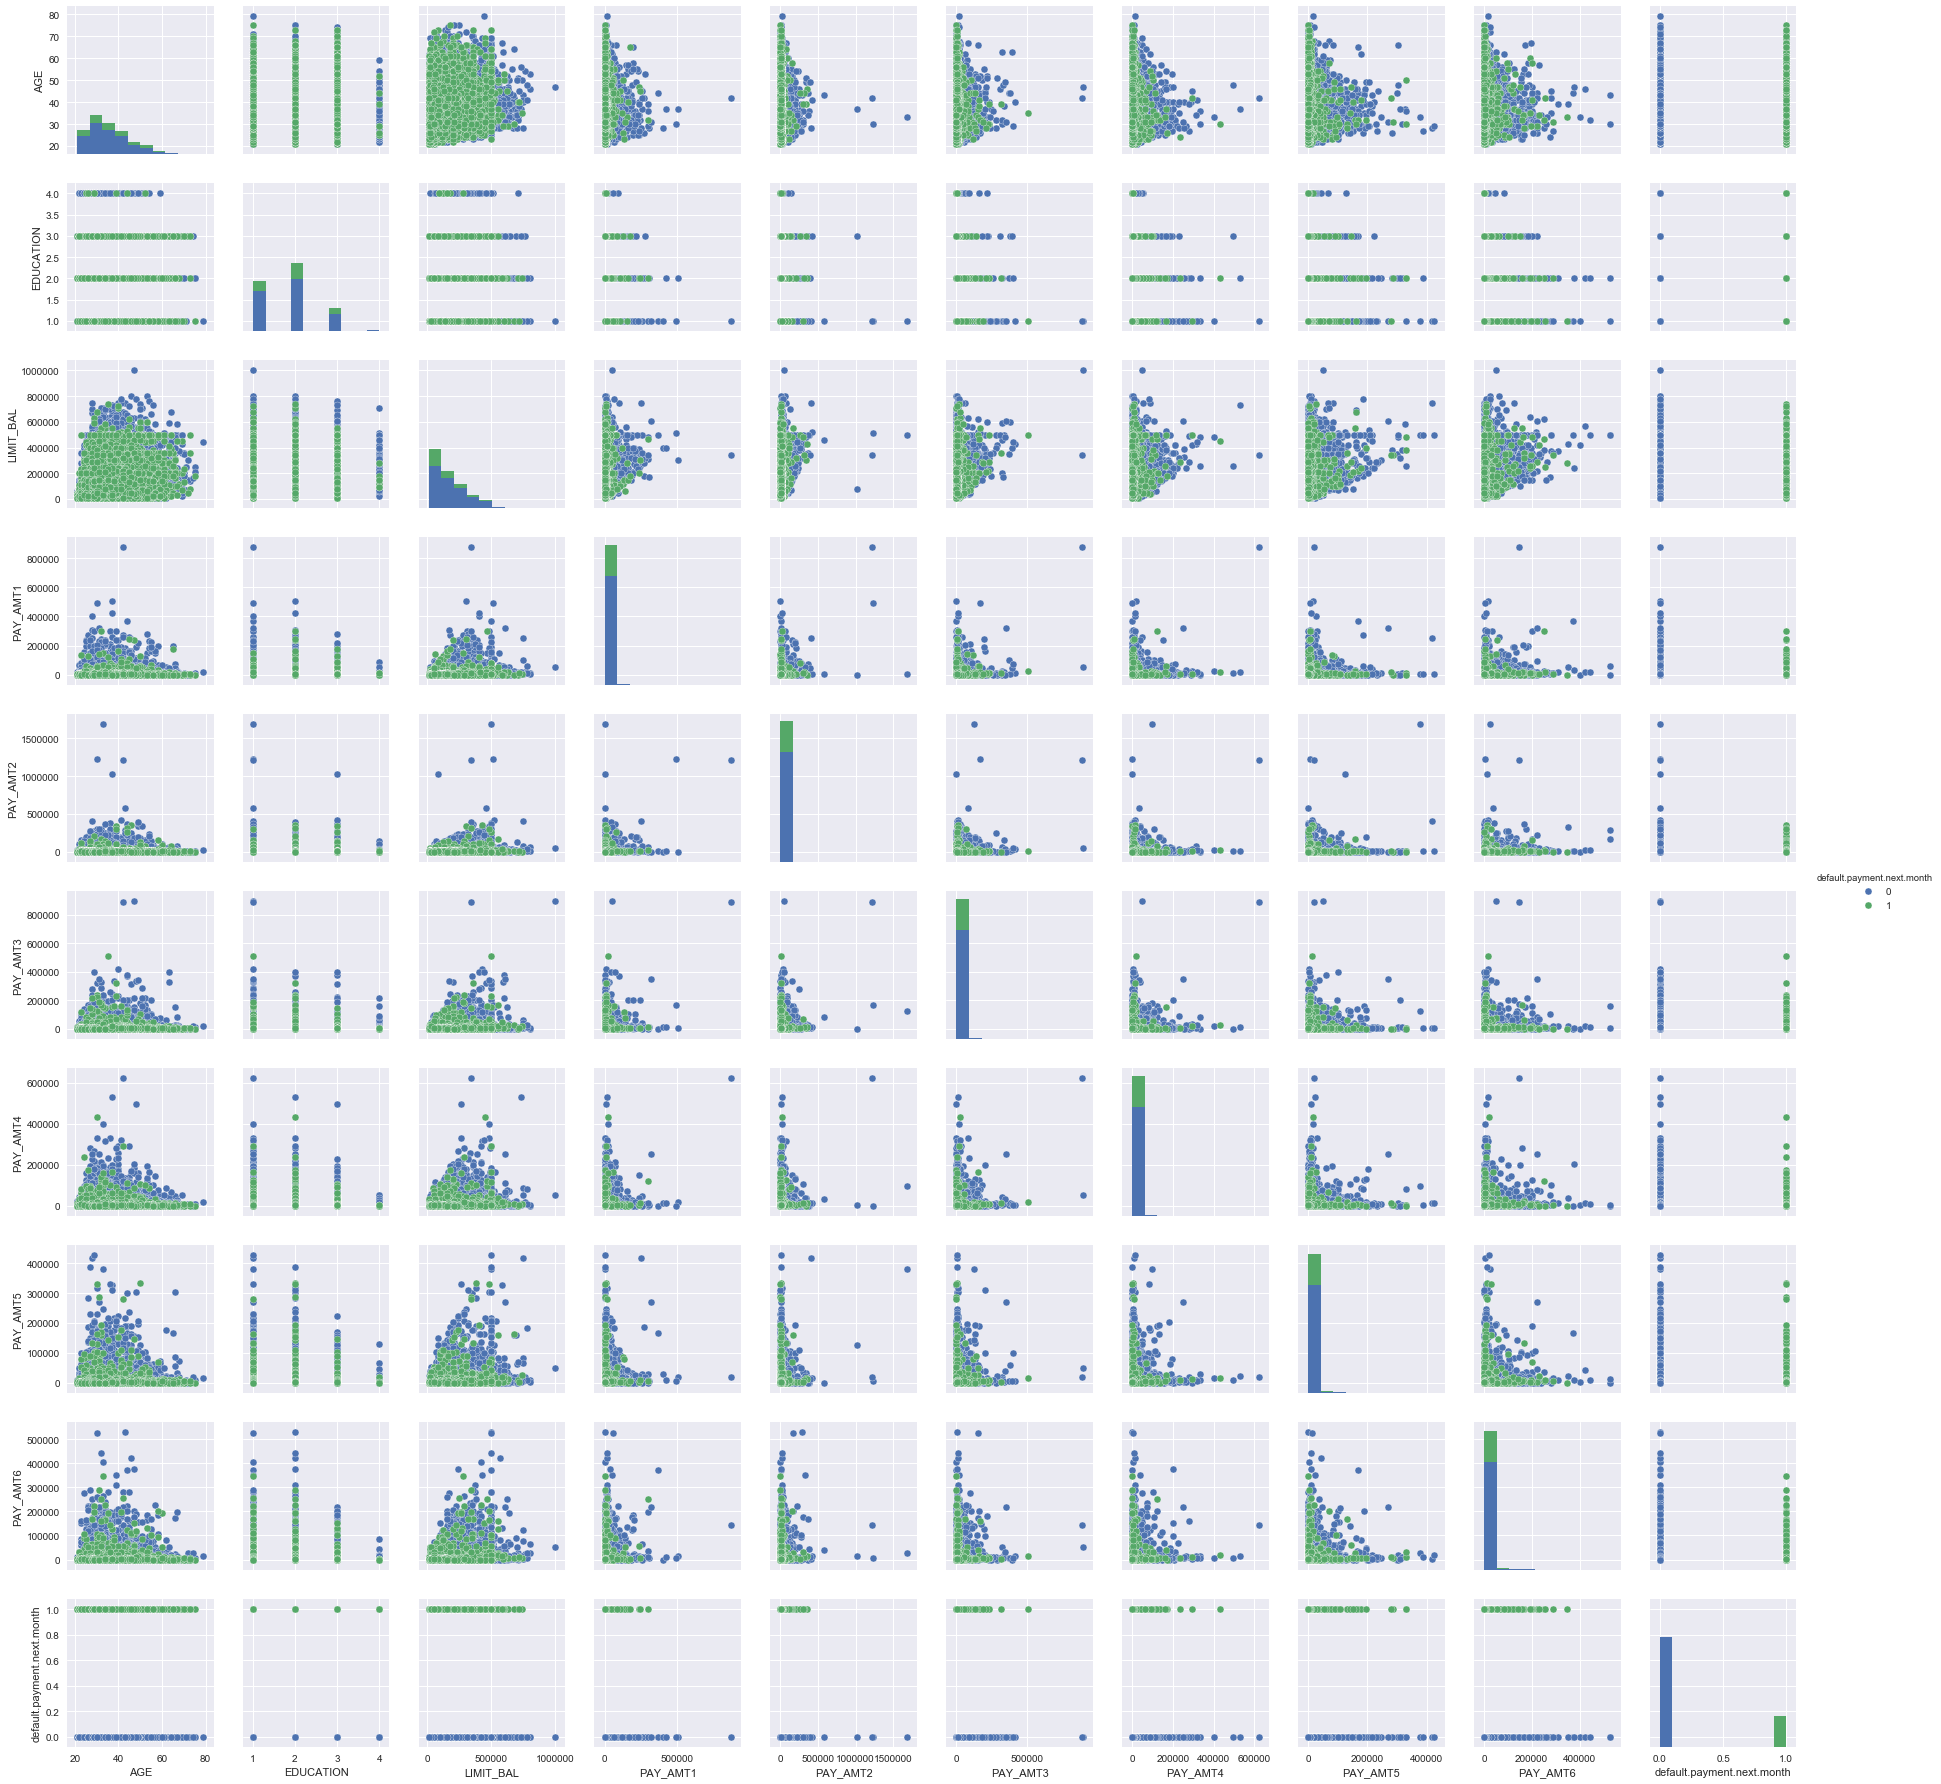

In [15]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
bill_box = sns.pairplot(data=uci_dataset[['AGE', 'EDUCATION', 'LIMIT_BAL', 'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 'default.payment.next.month']],
                        hue='default.payment.next.month')

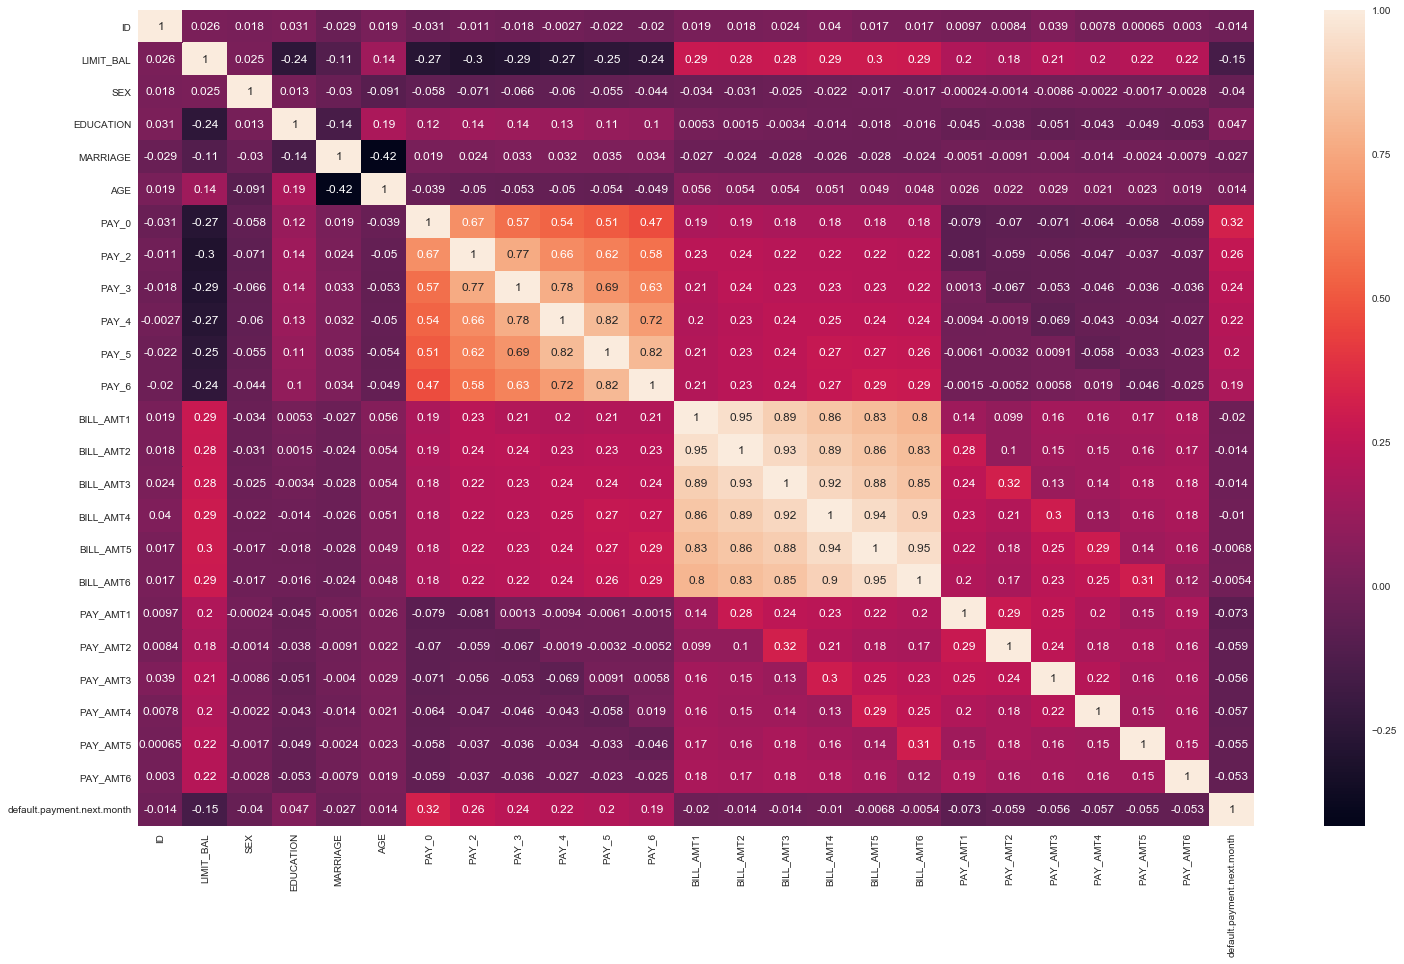

In [16]:
plt.figure(figsize=(25,15))
corr_mat= uci_dataset.corr()
sns.heatmap(corr_mat, annot=True)

Younger individuals in the data set from ages 21-29 have, in general, lower limit balances for their respective accounts. As educational levels increase, there is an increase in limit balances. Married individuals tend to have higher median limit balances in comparison to their single counterparts. Additionally, females exhibit slightly higher limit balances.

Since defaulting depends on an individual's ability to make payments in a 6-month timespan, there is an inference that features relating to an individual's financial capabilities (PAY AMOUNT, PAY STATUS, LIMIT BALANCE, AND BILL AMOUNT) may have a larger role as predictors for credit default.

<h1>Baseline Modeling</h1>
This section explores the models used in predicting credit card default. Models used include: Random Forest, Support Vector Machines, Neural Nets, Naive Bayes, kNN, XGBoost, and an ensemble method approach. These models are cross-validated amongst 10 folds utilizing a scaled variation of the data set.

In [17]:
from sklearn import svm, neural_network
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

seed=42

# Create train-test split
t_train, t_test = train_test_split(uci_dataset, train_size=0.7, test_size=0.3, random_state=seed)

# Create X and Y for fitting
Y_train = t_train['default.payment.next.month']
X_train = t_train.drop(['default.payment.next.month'],axis=1)
X_train = X_train.drop(['ID'],axis=1)


Y_test = t_test['default.payment.next.month']
X_test = t_test.drop(['ID','default.payment.next.month'], axis=1)


In [18]:
Y_test

2308     0
22404    0
23397    0
25058    0
2664     1
8511     0
5148     1
7790     0
11311    0
19043    0
10784    0
22246    0
3268     0
15947    1
14977    0
14474    0
28694    0
14054    0
26545    0
14980    1
17636    0
3931     1
8387     0
8028     0
9482     0
22572    0
15107    0
3673     1
21388    0
5937     0
        ..
26513    1
8410     1
18365    0
9480     1
9152     0
3728     1
2966     0
10428    0
14545    0
23760    0
15204    0
16778    0
19854    0
10664    0
16264    1
29769    0
26075    0
17931    1
9441     0
16072    0
23919    0
17137    1
19863    1
26750    0
14774    0
3941     1
17854    0
95       0
6279     0
26428    0
Name: default.payment.next.month, Length: 9000, dtype: int64

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

folds=3

clf_svm = svm.SVC(random_state=seed, probability=True)
clf_nn = neural_network.MLPClassifier(random_state=seed)

clf_xgb = xgb.XGBClassifier(seed=seed)
clf_knn = KNeighborsClassifier()

clf_dt = DecisionTreeClassifier(random_state=seed)

models = {
            'DecisionTree': clf_dt,
           'SVM': clf_svm, 
           'XGBoost': clf_xgb,
            'NeuralNet': clf_nn, 
           'KNN': clf_knn
         }

In [ ]:
#Get walltime


In [ ]:
for modelname, model in models.items():
   score = cross_val_score(model, X_train, Y_train, cv=folds)
   print(modelname + ' cv_score: ' + str(score.mean()))

In [23]:
model_results = pd.DataFrame()



In [ ]:
for modelname, model in models.items():
   model.fit(X_train, Y_train)
   m_pred = model.predict(X_test)
   model_results[modelname] = m_pred
   print(modelname + ' test_score:' + str(metrics.accuracy_score(Y_test, m_pred)))

An additional step to explore from the baseline models is ensembling, in which multiple learners are used together to improve predictive performance. The test ensemble below utilizes hard voting amongst 3 models: k-Nearest Neighbors, Support Vector Machines, and Neural Nets. It is important to utilize models that exhibit lower correlation amongst each other in order to prevent bias towards one particular answer.

In [41]:
model_results.corr()

,DecisionTree,SVM,XGBoost,NeuralNet,KNN
DecisionTree,1.000000,0.088214,0.361844,0.109457,0.114630
SVM,0.088214,1.000000,0.032059,-0.046667,0.203804
XGBoost,0.361844,0.032059,1.000000,0.279655,0.169334
NeuralNet,0.109457,-0.046667,0.279655,1.000000,0.127068
KNN,0.114630,0.203804,0.169334,0.127068,1.000000


In [29]:
from sklearn.metrics import roc_curve

model_proba = pd.DataFrame()

for modelname, model in models.items():
    model_proba[modelname] = model.predict_proba(X_test)[:,1]

fpr = {}
tpr = {}
thresh = {}
for modelname, _ in models.items():
    fpr[modelname], tpr[modelname], thresh[modelname], = roc_curve(Y_test,model_proba[modelname])

    
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
for modelname, _ in models.items():
    modelauc = metrics.auc(fpr[modelname], tpr[modelname])
    plt.plot(fpr[modelname], tpr[modelname], label=modelname + ' (area = %0.3f)' % modelauc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [32]:
from sklearn.model_selection import learning_curve

def plot_learning_curves(title, train_sizes, train_scores, valid_scores, ylim=None):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, np.mean(valid_scores, axis=1), 'o-', color="g", label="Cross-Valid Score")
    plt.legend(loc="best")
    plt.show()

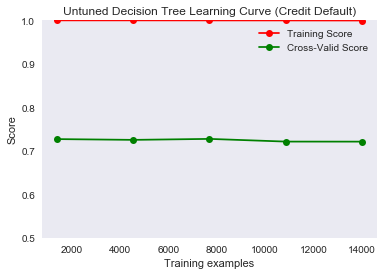

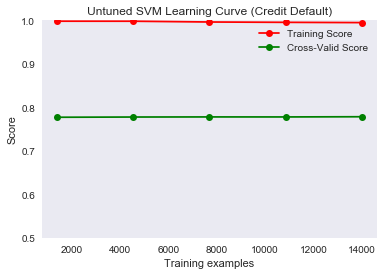

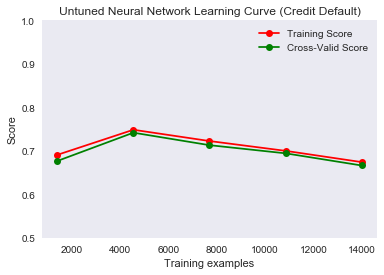

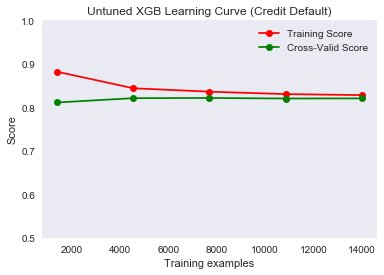

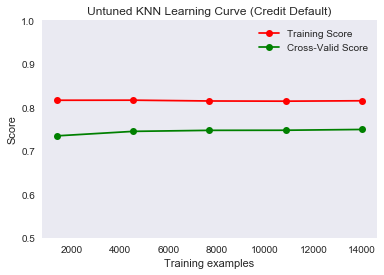

In [47]:
dt_sizes, dt_train_scores, dt_valid_scores = learning_curve(clf_dt, X_train, Y_train, train_sizes=np.linspace(0.1, 1.0, 5.0, 10.0), cv=folds)
plot_learning_curves('Untuned Decision Tree Learning Curve (Credit Default)', dt_sizes, dt_train_scores, dt_valid_scores, (.5, 1.0))

svm_sizes, svm_train_scores, svm_valid_scores = learning_curve(clf_svm, X_train, Y_train, train_sizes=np.linspace(0.1, 1.0, 5.0, 10.0), cv=folds)
plot_learning_curves('Untuned SVM Learning Curve (Credit Default)', svm_sizes, svm_train_scores, svm_valid_scores, (.5, 1.0))

nn_sizes, nn_train_scores, nn_valid_scores = learning_curve(clf_nn, X_train, Y_train, train_sizes=np.linspace(0.1,1.0,5.0,10.0), cv=folds)
plot_learning_curves('Untuned Neural Network Learning Curve (Credit Default)', nn_sizes, nn_train_scores, nn_valid_scores,(.5, 1.0))

xgb_sizes, xgb_train_scores, xgb_valid_scores = learning_curve(clf_xgb, X_train, Y_train, train_sizes=np.linspace(0.1,1.0,5.0,10.0), cv=folds)
plot_learning_curves('Untuned XGB Learning Curve (Credit Default)', xgb_sizes, xgb_train_scores, xgb_valid_scores, (.5, 1.0))

knn_sizes, knn_train_scores, knn_valid_scores = learning_curve(clf_knn, X_train, Y_train, train_sizes=np.linspace(0.1,1.0,5.0,10.0), cv=folds)
plot_learning_curves('Untuned KNN Learning Curve (Credit Default)', knn_sizes, knn_train_scores, knn_valid_scores, (.5, 1.0))


In [20]:
param_grid_knn = {
    'n_neighbors': [2,4,6,8,10,12,20,26],
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 20, 30, 40],
    'n_jobs': [-1],
}

param_grid_nn = {'solver': ['lbfgs'], 
                 'max_iter': [500,1000,1500], 
                 'alpha': 10.0 ** -np.arange(1, 7), 
                 'hidden_layer_sizes':np.arange(5, 12), 
                 'random_state':[0,1,2,3,4,5,6,7,8,9]
                }


param_grid_dt = {
                'criterion': ['entropy'],
                 'max_depth': np.arange(3, 10),
                 'min_samples_split': np.arange(3,10),
                 'min_samples_leaf': np.arange(3,10)
                }

    
    
param_grid_svc = {'C': [0.001, 0.01, 0.1, 1, 10], 
                  'gamma' : [0.001, 0.01, 0.1, 1]}

param_grid_xgb = {'n_estimators': [500,1000,1500,2000],
                 'max_depth': np.arange(3,10),
                 'learning_rate': [0.1, 0.05, 0.005]
                 }

In [24]:
grid_knn = GridSearchCV(clf_knn, param_grid=param_grid_knn, cv=3)
#grid_svm = GridSearchCV(clf_svm, param_grid_svc, cv=2)
grid_nn = GridSearchCV(clf_nn, param_grid_nn, cv=3)
grid_xgb = GridSearchCV(clf_xgb, param_grid_xgb, cv=3)
grid_dt = GridSearchCV(clf_dt, param_grid_dt, cv=3)


grid_models = {
    'g_DecisionTree': grid_dt,
    #'g_SVM': grid_svm,
    'g_XGBoost': grid_xgb,
    'g_Neural Net': grid_nn,
    'g_KNN': grid_knn
}

In [25]:
for modelname, model in grid_models.items():
   model.fit(X_train, Y_train)
   print(modelname+  "best params: " +  str(model.best_params_))

   m_pred = model.best_estimator_.predict(X_test)
   model_results[modelname] = m_pred
   print(modelname + ' test_score:' + str(metrics.accuracy_score(Y_test, m_pred)))

g_DecisionTreebest params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 3}
g_DecisionTree test_score:0.8205555555555556


C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

g_XGBoostbest params: {'learning_rate': 0.005, 'max_depth': 5, 'n_estimators': 1500}


C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


g_XGBoost test_score:0.8205555555555556
g_Neural Netbest params: {'alpha': 0.1, 'hidden_layer_sizes': 5, 'max_iter': 500, 'random_state': 9, 'solver': 'lbfgs'}
g_Neural Net test_score:0.7822222222222223
g_KNNbest params: {'leaf_size': 20, 'n_jobs': -1, 'n_neighbors': 26, 'weights': 'uniform'}
g_KNN test_score:0.7808888888888889


In [27]:
from sklearn.metrics import roc_curve

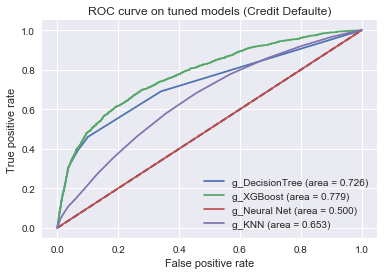

In [30]:
tmodel_proba = {}

for modelname, model in grid_models.items():
    tmodel_proba[modelname] = model.best_estimator_.predict_proba(X_test)[:,1]

t_fpr = {}
t_tpr = {}
t_thresh = {}

for modelname, _ in grid_models.items():
    t_fpr[modelname], t_tpr[modelname], t_thresh[modelname], = roc_curve(Y_test,tmodel_proba[modelname])

#plt.figure(1)
#plt.plot([0, 1], [0, 1], 'k--')
#for modelname, _ in models.items():
#    modelauc = metrics.auc(fpr[modelname], tpr[modelname])
#    plt.plot(fpr[modelname], tpr[modelname], label=modelname + ' (area = %0.3f)' % modelauc)
#plt.xlabel('False positive rate')
#plt.ylabel('True positive rate')
#plt.title('ROC curve on untuned models (Credit Default)')
#plt.legend(loc='best')

plt.figure(2)
plt.plot([0, 1], [0, 1], 'k--')
for modelname, _ in grid_models.items():
    modelauc = metrics.auc(t_fpr[modelname], t_tpr[modelname])
    plt.plot(t_fpr[modelname], t_tpr[modelname], label=modelname + ' (area = %0.3f)' % modelauc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve on tuned models (Credit Defaulte)')
plt.legend(loc='best')
plt.show()

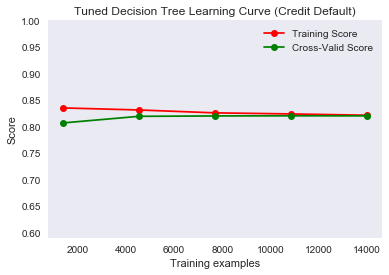

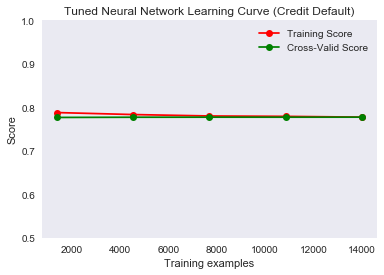

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rclong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


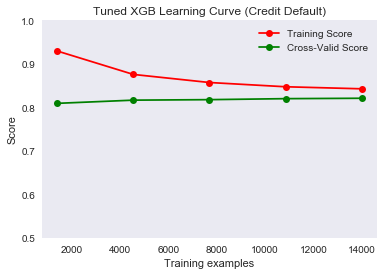

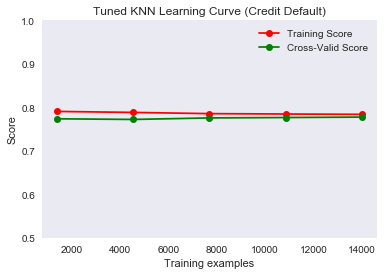

In [33]:
dt_sizes, dt_train_scores, dt_valid_scores = learning_curve(grid_dt.best_estimator_, X_train, Y_train, train_sizes=np.linspace(0.1, 1.0, 5.0, 10.0), cv=folds)
plot_learning_curves('Tuned Decision Tree Learning Curve (Credit Default)', dt_sizes, dt_train_scores, dt_valid_scores, (.59, 1.0))

#svm_sizes, svm_train_scores, svm_valid_scores = learning_curve(grid_svm.best_estimator_, X_train, Y_train, train_sizes=np.linspace(0.1, 1.0, 5.0, 10.0), cv=folds)
#plot_learning_curves('Tuned SVM Learning Curve (Credit Default)', svm_sizes, svm_train_scores, svm_valid_scores, (.5, 1.0))

nn_sizes, nn_train_scores, nn_valid_scores = learning_curve(grid_nn.best_estimator_, X_train, Y_train, train_sizes=np.linspace(0.1,1.0,5.0,10.0), cv=folds)
plot_learning_curves('Tuned Neural Network Learning Curve (Credit Default)', nn_sizes, nn_train_scores, nn_valid_scores, (.5, 1.0))

xgb_sizes, xgb_train_scores, xgb_valid_scores = learning_curve(grid_xgb.best_estimator_, X_train, Y_train, train_sizes=np.linspace(0.1,1.0,5.0,10.0), cv=folds)
plot_learning_curves('Tuned XGB Learning Curve (Credit Default)', xgb_sizes, xgb_train_scores, xgb_valid_scores, (.5, 1.0))

knn_sizes, knn_train_scores, knn_valid_scores = learning_curve(grid_knn.best_estimator_, X_train, Y_train, train_sizes=np.linspace(0.1,1.0,5.0,10.0), cv=folds)
plot_learning_curves('Tuned KNN Learning Curve (Credit Default)', knn_sizes, knn_train_scores, knn_valid_scores, (.5, 1.0))


### Tuned Model Evaluation
Through extensive grid searching, choices for model hyperparameters are narrowed down. In this section, we evaluate the accuracy metric of the tuned set of models and examine the ROC and learning curves for each.